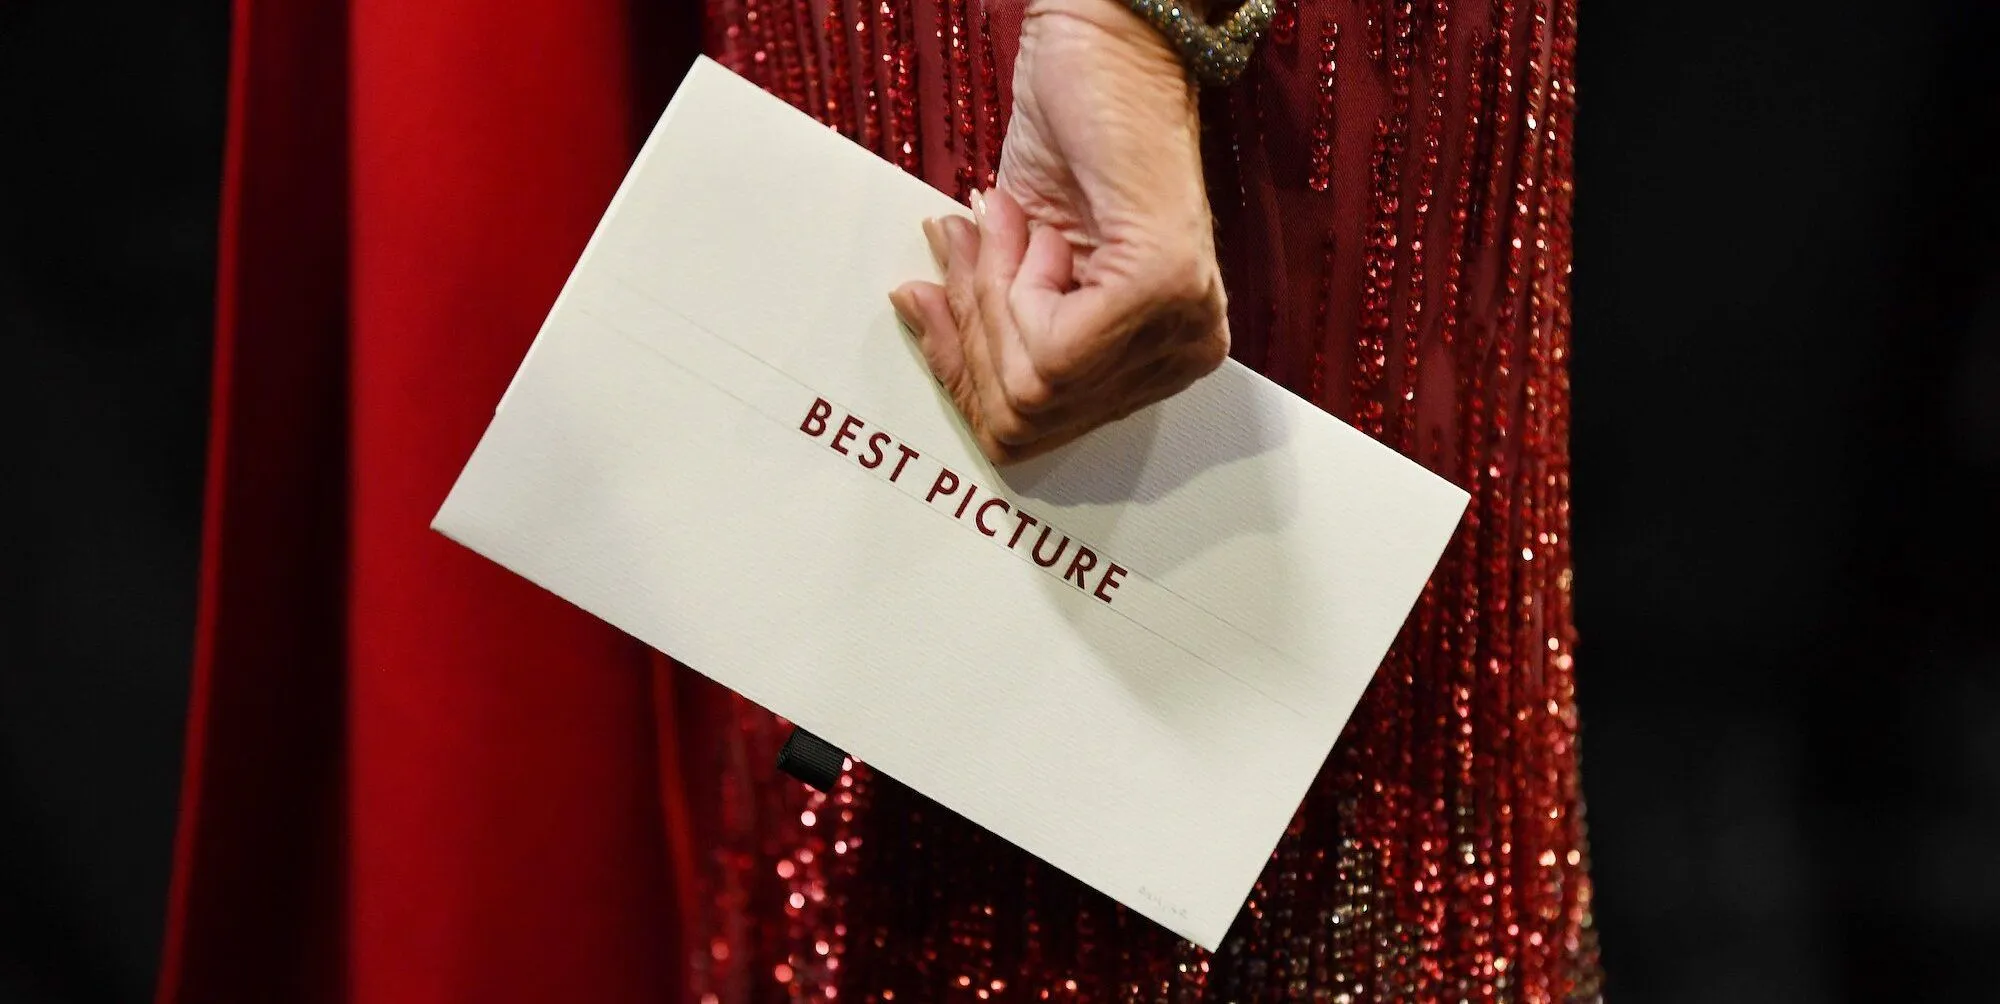

The popularity of online streaming platforms has led to an enormous amount of content being created and made available to viewers across the world. With so many options to choose from, users often find it overwhelming to pick a movie to watch. To help solve this problem, we have created a movie recommendation system that suggests movies based on the user's viewing history and preferences.<br>
Our project focuses on seven major streaming platforms: <b>Amazon Prime Video, Apple TV, Disney+, Hulu, HBO Max, Netflix, and Paramount+</b>. We have collected data from these platforms and analyzed it to gain insights into user behavior, content availability, and platform-specific trends.<br>
The project begins with a top-level analysis of the streaming industry, covering topics such as market share, user demographics, and content types. We will then dive into platform-specific analysis, examining each platform's movie offerings, the most popular genres, and the ratings and reviews of their content.<br>
Based on this analysis, we will develop a movie recommendation system that uses machine learning algorithms to suggest movies to users based on their viewing history and preferences. Our system will take into account factors such as genre, release year, and user ratings to make personalized recommendations that are relevant to the user's interests.<br>
We hope that our movie recommendation system will provide users with a more personalized and enjoyable streaming experience, while also providing valuable insights to streaming platforms about user behavior and content preferences.

<b>For the dataset:<br></b>
Amazon Prime Video: https://www.kaggle.com/datasets/dgoenrique/amazon-prime-movies-and-tv-shows <br>
Apple TV: https://www.kaggle.com/datasets/dgoenrique/apple-tv-movies-and-tv-shows <br>
Disney: https://www.kaggle.com/datasets/dgoenrique/disney-movies-and-tv-shows<br>
HBO: https://www.kaggle.com/datasets/dgoenrique/hbo-max-movies-and-tv-shows<br>
Netflix: https://www.kaggle.com/datasets/dgoenrique/netflix-movies-and-tv-shows<br>
Paramount: https://www.kaggle.com/datasets/dgoenrique/paramount-movies-and-tv-shows<br>
Hulu: https://www.kaggle.com/datasets/shivamb/hulu-movies-and-tv-shows

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
amazon_credits = pd.read_csv('amazon_credits.csv')
amazon_titles = pd.read_csv('amazon_titles.csv')
apple_credits = pd.read_csv('apple_credits.csv')
apple_titles = pd.read_csv('apple_titles.csv')
disney_credits = pd.read_csv('disney_credits.csv')
disney_titles = pd.read_csv('disney_titles.csv')
hbo_credits = pd.read_csv('hbo_credits.csv')
hbo_titles = pd.read_csv('hbo_titles.csv')
netflix_credits = pd.read_csv('netflix_credits.csv')
netflix_titles = pd.read_csv('netflix_titles.csv')
paramount_credits = pd.read_csv('paramount_credits.csv')
paramount_titles = pd.read_csv('paramount_titles.csv')

*Please note the data for Hulu is not the same as the data for the rest of the platforms. We do not have imdb/tmdb scores, popularity or votes. Hence, data for Hulu is only used for visualization purpose*

In [3]:
ott_content = pd.concat([amazon_titles,apple_titles,disney_titles,hbo_titles,netflix_titles,paramount_titles], axis = 0)

In [4]:
ott_content.head(3)

id                  title   type  \
0   tm87233  It's a Wonderful Life  MOVIE   
1  tm143047              Duck Soup  MOVIE   
2   tm83884        His Girl Friday  MOVIE   

                                         description  release_year  \
0  A holiday favourite for generations...  George...          1946   
1  Rufus T. Firefly is named president/dictator o...          1933   
2  Hildy, the journalist former wife of newspaper...          1940   

  age_certification  runtime  \
0                PG      130   
1               NaN       69   
2               NaN       92   

                                              genres production_countries  \
0  ['drama', 'family', 'fantasy', 'romance', 'com...               ['US']   
1                                  ['comedy', 'war']               ['US']   
2                     ['drama', 'romance', 'comedy']               ['US']   

   seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0      NaN  tt0038650         8.6    467766.0           27.611       8.261  
1      NaN  tt0023969         7.8     60933.0            9.013       7.357  
2      NaN  tt0032599         7.8     60244.0           14.759       7.433

Since we have combined data from all the platforms, there could be duplicate rows. Therefore, in order to remove duplicates...

In [5]:
ott_content[ott_content.duplicated()].shape

(1884, 15)

In [6]:
ott_content = ott_content.drop_duplicates()

In [7]:
# handling missing values 
def null_rate_fn(ott_content):
    for i in ott_content.columns: 
        null_rate = ott_content[i].isna().sum()/len(ott_content) *100
        if null_rate > 0:
            print("{} null rate is {}%".format(i,round(null_rate,2)))

In [8]:
null_rate_fn(ott_content)

description null rate is 0.83%
age_certification null rate is 51.28%
seasons null rate is 75.93%
imdb_id null rate is 8.35%
imdb_score null rate is 10.95%
imdb_votes null rate is 11.21%
tmdb_popularity null rate is 3.08%
tmdb_score null rate is 12.84%


Seasons has the highest null values.

In [9]:
len(ott_content.loc[ott_content['seasons'].isna() & (ott_content['type'] == 'MOVIE')]) == ott_content.seasons.isna().sum()

True

Whereever seasons is na, the type of content is movie. Hence, we can put the value of seasons to be 0 for a movie.

In [10]:
ott_content.seasons.fillna(0, inplace = True)

In [11]:
ott_content.genres.value_counts()

['documentation']                                                  1879
['comedy']                                                         1726
['drama']                                                          1593
['drama', 'romance']                                                431
['drama', 'comedy']                                                 383
                                                                   ... 
['comedy', 'romance', 'drama', 'fantasy']                             1
['drama', 'war', 'action', 'history']                                 1
['drama', 'sport', 'crime']                                           1
['crime', 'comedy', 'romance']                                        1
['action', 'fantasy', 'comedy', 'drama', 'romance', 'thriller']       1
Name: genres, Length: 4485, dtype: int64

In [12]:
ott_content['genres'] = ott_content['genres'].str.replace(r'[','').str.replace(r"'","").str.replace(r']','')

/var/folders/kd/vczjh0f55158sc6lflbyfd4w0000gn/T/ipykernel_5723/1289134207.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ott_content['genres'] = ott_content['genres'].str.replace(r'[','').str.replace(r"'","").str.replace(r']','')


In [13]:
ott_content['production_countries'] = ott_content['production_countries'].str.replace(r'[','').str.replace(r"'","").str.replace(r']','')

/var/folders/kd/vczjh0f55158sc6lflbyfd4w0000gn/T/ipykernel_5723/1437281083.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ott_content['production_countries'] = ott_content['production_countries'].str.replace(r'[','').str.replace(r"'","").str.replace(r']','')


In [14]:
ott_content.head(2)

id                  title   type  \
0   tm87233  It's a Wonderful Life  MOVIE   
1  tm143047              Duck Soup  MOVIE   

                                         description  release_year  \
0  A holiday favourite for generations...  George...          1946   
1  Rufus T. Firefly is named president/dictator o...          1933   

  age_certification  runtime                                   genres  \
0                PG      130  drama, family, fantasy, romance, comedy   
1               NaN       69                              comedy, war   

  production_countries  seasons    imdb_id  imdb_score  imdb_votes  \
0                   US      0.0  tt0038650         8.6    467766.0   
1                   US      0.0  tt0023969         7.8     60933.0   

   tmdb_popularity  tmdb_score  
0           27.611       8.261  
1            9.013       7.357

In [15]:
ott_content['genre'] = ott_content['genres'].apply(lambda x: x.split(',')[0])

In [16]:
ott_content['production_country'] = ott_content['production_countries'].apply(lambda x: x.split(',')[0])

In [17]:
ott_content.head(2)

id                  title   type  \
0   tm87233  It's a Wonderful Life  MOVIE   
1  tm143047              Duck Soup  MOVIE   

                                         description  release_year  \
0  A holiday favourite for generations...  George...          1946   
1  Rufus T. Firefly is named president/dictator o...          1933   

  age_certification  runtime                                   genres  \
0                PG      130  drama, family, fantasy, romance, comedy   
1               NaN       69                              comedy, war   

  production_countries  seasons    imdb_id  imdb_score  imdb_votes  \
0                   US      0.0  tt0038650         8.6    467766.0   
1                   US      0.0  tt0023969         7.8     60933.0   

   tmdb_popularity  tmdb_score   genre production_country  
0           27.611       8.261   drama                 US  
1            9.013       7.357  comedy                 US

In [18]:
ott_content.drop(columns = ['imdb_id','genres','production_countries'], inplace = True, axis = 1)

In [19]:
ott_content.head()

id                  title   type  \
0   tm87233  It's a Wonderful Life  MOVIE   
1  tm143047              Duck Soup  MOVIE   
2   tm83884        His Girl Friday  MOVIE   
3   ts20945      The Three Stooges   SHOW   
4    tm5012              Red River  MOVIE   

                                         description  release_year  \
0  A holiday favourite for generations...  George...          1946   
1  Rufus T. Firefly is named president/dictator o...          1933   
2  Hildy, the journalist former wife of newspaper...          1940   
3  The Three Stooges were an American vaudeville ...          1934   
4  Headstrong Thomas Dunson starts a thriving Tex...          1948   

  age_certification  runtime  seasons  imdb_score  imdb_votes  \
0                PG      130      0.0         8.6    467766.0   
1               NaN       69      0.0         7.8     60933.0   
2               NaN       92      0.0         7.8     60244.0   
3             TV-PG       19     26.0         8.5      1149.0   
4               NaN      133      0.0         7.8     32210.0   

   tmdb_popularity  tmdb_score    genre production_country  
0           27.611       8.261    drama                 US  
1            9.013       7.357   comedy                 US  
2           14.759       7.433    drama                 US  
3           15.424       7.600   comedy                 US  
4           12.400       7.400  western                 US

In [20]:
lt = []

for i in ott_content['id']:
    platform = []
    if i in amazon_titles['id'].values:
        platform.append('amazon_prime_video')
    if i in apple_titles['id'].values:
        platform.append('apple_tv')
    if i in disney_titles['id'].values:
        platform.append('disney+')
    if i in hbo_titles['id'].values:
        platform.append('hbo_max')
    if i in netflix_titles['id'].values:
        platform.append('netflix')
    if i in paramount_titles['id'].values:
        platform.append('paramount+')
    lt.append(platform)

In [21]:
ott_content['streaming_platform'] = lt

# The Language of Cinema

### Could be possible that certain words appear more frequently in movie titles, and are considered more powerful or appropriate for a title? 

By analyzing the frequency of words, we can also identify whether certain words are more commonly used in titles, and gain insights into any patterns or trends in the data. 

In [22]:
ott_content['title'] = ott_content['title'].astype('str')

In [23]:
title_corpus = ' '.join(ott_content['title'])

In [24]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image #to load our image

In [25]:
# text = open('batman.txt', 'r').read()
stopwords = set(STOPWORDS)

In [26]:
# Define a function to specify the text color
def white_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(255, 255, 255)"

custom_mask = np.array(Image.open('batman.png')) 
wc = WordCloud(background_color = 'black',
               stopwords = stopwords,
               mask = custom_mask,height = 2000, width = 4000, color_func=white_color_func)

wc.generate(title_corpus)

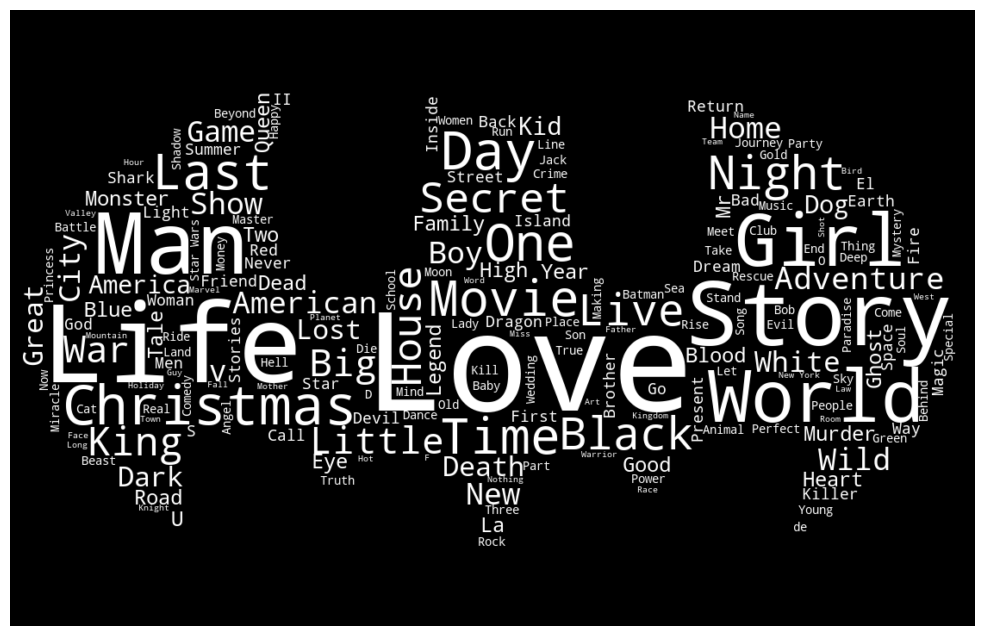

In [27]:
plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

When we analyze the frequency of words, we can gain valuable insights into patterns and trends in a dataset. One way we can do this is by examining the words that are most frequently used in titles. By doing so, we can identify which words are most commonly used and gain an understanding of the types of themes or topics that are popular among the titles in a given dataset.<br>
For instance, <b>we find that certain words like 'Love' and 'Life' are more frequently used than others. This insight could suggest that movies with themes related to these words are more popular or more likely to be successful. Other words that are commonly used in movie titles might include 'Death', 'Adventure', 'Comedy' or 'Action', among others.</b><br>
By understanding these patterns and trends in the data, we can apply this knowledge to various tasks such as predicting the success of future movie titles or creating marketing strategies to target specific audiences. Overall, analyzing the frequency of words in titles can provide valuable insights into the themes and trends that are most popular among a given dataset, and can help us draw meaningful conclusions about the data.

In [28]:
# wc.to_file('Batman_wordcloud_black.png') # to save the image

In [29]:
ott_content.head(2)

id                  title   type  \
0   tm87233  It's a Wonderful Life  MOVIE   
1  tm143047              Duck Soup  MOVIE   

                                         description  release_year  \
0  A holiday favourite for generations...  George...          1946   
1  Rufus T. Firefly is named president/dictator o...          1933   

  age_certification  runtime  seasons  imdb_score  imdb_votes  \
0                PG      130      0.0         8.6    467766.0   
1               NaN       69      0.0         7.8     60933.0   

   tmdb_popularity  tmdb_score   genre production_country  \
0           27.611       8.261   drama                 US   
1            9.013       7.357  comedy                 US   

     streaming_platform  
0  [amazon_prime_video]  
1  [amazon_prime_video]

## Are production houses more likely to produce content about certain topics? Well, let's find out..

In [30]:
ott_content['description'] = ott_content['description'].astype('str')

In [31]:
description_corpus = ' '.join(ott_content['description'])

In [32]:
def red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(255, 0, 0)"

custom_mask = np.array(Image.open('wonderwoman.jpg')) 
wc = WordCloud(background_color = 'black',
               stopwords = stopwords,
               mask = custom_mask,height = 2000, width = 4000, color_func=red_color_func)

wc.generate(description_corpus)

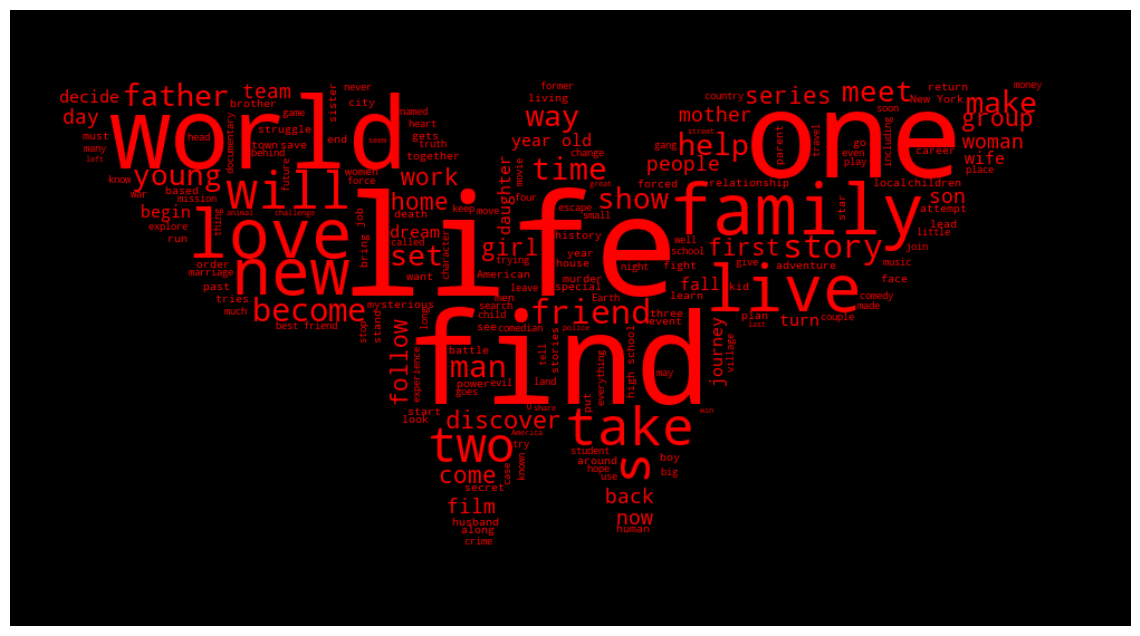

In [33]:
plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

<b>It is possible that production houses tend to produce content on topics such as 'Love', 'Life', 'One', and 'World' more frequently due to their popularity among audiences. </b> These themes often resonate with people and are common themes in many different types of media, including movies, TV shows, and books.<br>
However, it is also important to note that production houses may have different strategies and goals when it comes to the content they produce. For example, some production houses may focus on producing content that appeals to a specific demographic or target audience. In this case, they may choose to produce content on a particular theme to attract and retain that audience.<br>
Additionally, production houses may also prioritize producing content that they believe will be profitable or successful. This could lead them to produce content on certain themes that have a proven track record of success, or to invest in genres or themes that are currently trending or in high demand.
Overall, while it is possible that production houses tend to produce content on certain themes more frequently, it is important to consider the many different factors that can influence their decisions when it comes to the content they produce.

In [34]:
ott_content.head(2)

id                  title   type  \
0   tm87233  It's a Wonderful Life  MOVIE   
1  tm143047              Duck Soup  MOVIE   

                                         description  release_year  \
0  A holiday favourite for generations...  George...          1946   
1  Rufus T. Firefly is named president/dictator o...          1933   

  age_certification  runtime  seasons  imdb_score  imdb_votes  \
0                PG      130      0.0         8.6    467766.0   
1               NaN       69      0.0         7.8     60933.0   

   tmdb_popularity  tmdb_score   genre production_country  \
0           27.611       8.261   drama                 US   
1            9.013       7.357  comedy                 US   

     streaming_platform  
0  [amazon_prime_video]  
1  [amazon_prime_video]

In [35]:
# Filter out rows where the release_year column is less than 1980
df = ott_content[ott_content['release_year'] > 1980]

# Group the data by year and type of content and count the number of movies/shows in each year for each content type
yearly_count = df.groupby(['release_year', 'type'])['title'].count().reset_index()

# Create a new dataframe with the year, type of content, and the cumulative sum of movies/shows for each year for each content type
yearly_cumulative_sum = pd.DataFrame(yearly_count)
yearly_cumulative_sum['cumulative_sum'] = yearly_cumulative_sum.groupby('type')['title'].cumsum()

# Create a line chart using Plotly with the year on the x-axis, the cumulative sum of movies/shows on the y-axis, and the type of content as the category
fig = px.area(yearly_cumulative_sum, x='release_year', y='cumulative_sum', color='type', title='Year-on-Year Trend for Type of Content Released')
fig.update_layout(xaxis_title='Years', yaxis_title='Cumulative sum', legend_title='Type of Content')
fig.show()

Based on the chart, we can see that there has been a significant increase in the amount of content being produced since the inception of the industry. This growth appears to be exponential, suggesting that the industry is expanding at a rapid pace.<br>
In recent years, the rise of Over-The-Top (OTT) platforms has also contributed to this growth in content creation. These platforms provide a space for new and independent creators to produce and distribute their own content, which has led to a significant increase in the amount of content being created.<br>
This increase in content creation is due to a variety of factors, such as the proliferation of digital technologies, the growth of the internet, and the rise of social media. These factors have made it easier and more accessible for creators to produce and distribute their own content, which has led to a democratization of the industry and an increase in diversity of voices and perspectives.<br>
As a result of this growth, the industry is becoming increasingly competitive, with more and more creators vying for attention and audiences. While this can be challenging for some, it also presents new opportunities for innovation and creativity, as well as for audiences to discover new and exciting content that they may not have otherwise encountered.<br>
Overall, the increase in content creation is a testament to the power and potential of the industry, and we can expect this trend to continue in the years to come.

In [36]:
ott_content.head(2)

id                  title   type  \
0   tm87233  It's a Wonderful Life  MOVIE   
1  tm143047              Duck Soup  MOVIE   

                                         description  release_year  \
0  A holiday favourite for generations...  George...          1946   
1  Rufus T. Firefly is named president/dictator o...          1933   

  age_certification  runtime  seasons  imdb_score  imdb_votes  \
0                PG      130      0.0         8.6    467766.0   
1               NaN       69      0.0         7.8     60933.0   

   tmdb_popularity  tmdb_score   genre production_country  \
0           27.611       8.261   drama                 US   
1            9.013       7.357  comedy                 US   

     streaming_platform  
0  [amazon_prime_video]  
1  [amazon_prime_video]

In [37]:
# Filter out rows where the release_year column is less than 1980
df = ott_content[ott_content['release_year'] > 1980]
df = df[df['type']=='MOVIE']
# Group the data by genre and calculate the total runtime for each genre
genre_runtime = df.groupby('genre')['runtime'].mean().reset_index()

# Sort the genres by total runtime in descending order and select the top 10 genres
top_genres = genre_runtime.sort_values('runtime', ascending=False).head(10)['genre']

# Filter the original dataframe to include only rows with the top 10 genres
df = df[df['genre'].isin(top_genres)]

# Group the data by year and genre, and calculate the average runtime for each year and genre
yearly_runtime = df.groupby(['release_year', 'genre'])['runtime'].mean().reset_index()

# Create a bar chart using Plotly with the year on the x-axis, the average runtime on the y-axis, and the genre as the category
fig = px.bar(yearly_runtime, x='release_year', y='runtime', color='genre', title='Year-on-Year Trend of Movie Runtime for Top 10 Genres')
fig.update_layout(xaxis_title='Years', yaxis_title='Average Runtime(mins)', legend_title='Genre')
fig.show()

<b>From the chart we don't see much variation in the runtime of genres for movies over the years. </b>In general, it is possible that the runtime of movies within a particular genre may not vary significantly over the years. This may be due to a variety of factors, such as audience expectations, narrative structures, and storytelling conventions within that genre.<br>
For example, action movies are typically known for being fast-paced and action-packed, with a runtime that typically falls within a specific range. Similarly, romantic movies often have a particular narrative structure that may not allow for significant changes in runtime.<br>
Overall, while there may not be significant variation in runtime across certain genres, it is important to consider other factors that may be influencing the storytelling and production of movies within those genres.

In [38]:
# Filter out rows where the release_year column is less than 1980
df = ott_content[ott_content['release_year'] > 1980]
seasons = df[df['type']=='SHOW']
# Group the data by genre and calculate the total runtime for each genre
genre_runtime = seasons.groupby('genre')['seasons'].mean().reset_index()

# Sort the genres by total runtime in descending order and select the top 10 genres
top_genres = genre_runtime.sort_values('seasons', ascending=False).head(10)['genre']

# Filter the original dataframe to include only rows with the top 10 genres
seasons = seasons[seasons['genre'].isin(top_genres)]

# Group the data by year and genre, and calculate the average runtime for each year and genre
yearly_runtime = seasons.groupby(['release_year', 'genre'])['seasons'].mean().reset_index()

# Create a bar chart using Plotly with the year on the x-axis, the average runtime on the y-axis, and the genre as the category
fig = px.bar(yearly_runtime, x='release_year', y='seasons', color='genre', title='Year-on-Year Trend of Average Number of Seasons in a Show for Top 10 Genres')
fig.update_layout(xaxis_title='Years', yaxis_title='Average No.of Seasons', legend_title='Genre')
fig.show()

<b>When it comes to TV shows, there is often a lot more variation in runtime within a particular genre than there is in movies.</b> <br>This is due to a few reasons:<br>
Firstly, TV shows have more time to tell a story than a movie does. Whereas a movie typically has a runtime of around 90-120 minutes, a TV show can have multiple episodes that each run for 30-60 minutes or more. This allows for greater flexibility in storytelling and pacing, and can result in more significant differences in runtime between episodes.<br>
Secondly, TV shows often have multiple seasons, which means that the story can evolve and change over time. As the story progresses, the runtime of individual episodes may change to accommodate new plot developments, character arcs, and themes.<br>
Finally, TV shows are often produced over a longer period of time than movies, which means that there may be more opportunities for changes in runtime to occur. For example, if a particular TV show becomes more popular, the studio may decide to increase the runtime of each episode to provide more content for viewers.
Overall, the longer format and extended production schedules of TV shows means that there is often greater variation in runtime within a particular genre than there is in movies.

In [39]:
ott_content.head(2)

id                  title   type  \
0   tm87233  It's a Wonderful Life  MOVIE   
1  tm143047              Duck Soup  MOVIE   

                                         description  release_year  \
0  A holiday favourite for generations...  George...          1946   
1  Rufus T. Firefly is named president/dictator o...          1933   

  age_certification  runtime  seasons  imdb_score  imdb_votes  \
0                PG      130      0.0         8.6    467766.0   
1               NaN       69      0.0         7.8     60933.0   

   tmdb_popularity  tmdb_score   genre production_country  \
0           27.611       8.261   drama                 US   
1            9.013       7.357  comedy                 US   

     streaming_platform  
0  [amazon_prime_video]  
1  [amazon_prime_video]

In [40]:
ott_content_filtered = ott_content

In [41]:
# Convert the "streaming_platform" and "genre" columns to string datatype
ott_content_filtered['streaming_platform'] = ott_content_filtered['streaming_platform'].astype(str)
ott_content_filtered['genre'] = ott_content_filtered['genre'].astype(str)

# Define a list of streaming platforms to filter out
streaming_platforms_to_filter = ['amazon_prime_video', 'apple_tv', 'disney+','netflix','hbo_max','paramount+']

# Filter out rows that have the specified streaming platforms
ott_content_filtered = ott_content.loc[~ott_content['streaming_platform'].isin(streaming_platforms_to_filter)]

# Group the data based on the streaming platform and the genre, and calculate the count of movies or TV shows in each group
grouped_data = ott_content_filtered.groupby(['streaming_platform', 'genre']).size().reset_index(name='count')

# Create a new dataframe that shows the streaming platform, genre, and count of movies or TV shows for each group
platform_genre_count = grouped_data.groupby(['streaming_platform', 'genre'])['count'].sum().reset_index()

# Create a sunburst chart that shows the streaming platform on the outer ring, the genre on the inner ring, and the count of movies or TV shows as the size of the segments
fig = px.sunburst(platform_genre_count, path=['streaming_platform', 'genre'], values='count', 
                  title='Streaming Platforms and their Genres', 
                  color='count',
                  color_continuous_scale='RdBu',
                  hover_data=['count'],
                  labels={'count':'Number of Titles'})
fig.show()

It seems like there are some differences in the distribution of content based on genres across different streaming platforms. Amazon Prime Video seems to focus on drama, followed by comedy, documentation, thriller, and action, while Netflix also has a lot of drama, followed by comedy and documentation. Disney, on the other hand, seems to have more documentation content, followed by comedy.<br>
These differences in content distribution may reflect the different target audiences and brand identities of each platform. For example, Amazon Prime Video may be targeting viewers who are interested in more serious, dramatic content, while Netflix may be targeting a similar audience but with a slightly more comedic and lighthearted tone. Disney, on the other hand, may be targeting families and children with its documentary and comedic content.

In [42]:
ott_content.head(2)

id                  title   type  \
0   tm87233  It's a Wonderful Life  MOVIE   
1  tm143047              Duck Soup  MOVIE   

                                         description  release_year  \
0  A holiday favourite for generations...  George...          1946   
1  Rufus T. Firefly is named president/dictator o...          1933   

  age_certification  runtime  seasons  imdb_score  imdb_votes  \
0                PG      130      0.0         8.6    467766.0   
1               NaN       69      0.0         7.8     60933.0   

   tmdb_popularity  tmdb_score   genre production_country  \
0           27.611       8.261   drama                 US   
1            9.013       7.357  comedy                 US   

       streaming_platform  
0  ['amazon_prime_video']  
1  ['amazon_prime_video']

In [43]:
ott_content.production_country.value_counts()

US    12654
IN     1797
GB     1544
       1049
CA      815
      ...  
JM        1
LV        1
NI        1
LT        1
BS        1
Name: production_country, Length: 129, dtype: int64

In [44]:
# Drop the rows where the "production_country" is an empty list
ott_content = ott_content[ott_content['production_country'] != '']

# Reset the index of the dataframe
ott_content.reset_index(drop=True, inplace=True)

# Get the value counts for the "production_country" column and select the top 10
top_countries = ott_content['production_country'].value_counts().nlargest(10)

# Create a bar chart of the top production countries using plotly
fig = px.bar(x=top_countries.index, y=top_countries.values,
             labels={'x': 'Country', 'y': 'Number of Titles'},
             title='Top 10 Production Countries')

# Show the plot
fig.show()

### The United States of America is the largest content producing country in the world

The United States is currently the highest content producing country in the world, with a prolific film and television industry that is known globally. This is due to a variety of factors, including the large number of studios and production companies based in the US, the availability of funding and resources, and the global demand for American media.<br>
The US film and television industry has a long history of producing successful and influential content, and many popular genres and formats originated in the US, such as the Hollywood blockbuster and the TV sitcom. Additionally, the dominance of English as a global language has also contributed to the popularity of American media around the world.<br>
However, it's worth noting that other countries are also making significant contributions to the global content landscape, and the distribution of content production is not evenly spread. For example, India has a thriving film industry that produces a large number of films every year, while countries like South Korea, Japan, and the UK are also known for their unique and innovative media productions.
Overall, while the US is currently the highest content producing country in the world, the global content landscape is constantly changing and evolving, with new voices and perspectives emerging from around the world.

In [45]:
ott_content.head(2)

id                  title   type  \
0   tm87233  It's a Wonderful Life  MOVIE   
1  tm143047              Duck Soup  MOVIE   

                                         description  release_year  \
0  A holiday favourite for generations...  George...          1946   
1  Rufus T. Firefly is named president/dictator o...          1933   

  age_certification  runtime  seasons  imdb_score  imdb_votes  \
0                PG      130      0.0         8.6    467766.0   
1               NaN       69      0.0         7.8     60933.0   

   tmdb_popularity  tmdb_score   genre production_country  \
0           27.611       8.261   drama                 US   
1            9.013       7.357  comedy                 US   

       streaming_platform  
0  ['amazon_prime_video']  
1  ['amazon_prime_video']

In [46]:
# Create a histogram of "tomb_popularity" values using Plotly
fig = px.histogram(ott_content, x='tmdb_score', nbins=20)

# Set the title and axis labels
fig.update_layout(title={
                'font': {'size': 22},
                    'x': 0.5,
                    'y': 0.95 ,
                 'text':'Distribution of TMDB Score'},
                  xaxis_title='TMDB Score',
                  yaxis_title='Frequency', bargap=0.05)

# Display the plot
fig.show()

The TMDB scores represent the average rating of a movie or TV show on the TMDB platform, based on user votes and reviews. If the distribution of user ratings and reviews is normally distributed, then the distribution of TMDB scores may also be normally distributed.<br>
However, it's important to keep in mind that the shape of the distribution can be influenced by a variety of factors, such as the popularity of the content, the quality of the content, and the demographics of the users who are rating and reviewing the content. For example, a highly popular movie or TV show may receive a large number of positive ratings, which could skew the distribution to the right and create a positively skewed distribution rather than a normal one.<br>
Additionally, the distribution of TMDB scores may also vary depending on the genre or type of content being rated. For example, action movies may receive higher average ratings than romantic comedies, leading to a different distribution of scores for each genre.

In [47]:
ott_content.head()

id                  title   type  \
0   tm87233  It's a Wonderful Life  MOVIE   
1  tm143047              Duck Soup  MOVIE   
2   tm83884        His Girl Friday  MOVIE   
3   ts20945      The Three Stooges   SHOW   
4    tm5012              Red River  MOVIE   

                                         description  release_year  \
0  A holiday favourite for generations...  George...          1946   
1  Rufus T. Firefly is named president/dictator o...          1933   
2  Hildy, the journalist former wife of newspaper...          1940   
3  The Three Stooges were an American vaudeville ...          1934   
4  Headstrong Thomas Dunson starts a thriving Tex...          1948   

  age_certification  runtime  seasons  imdb_score  imdb_votes  \
0                PG      130      0.0         8.6    467766.0   
1               NaN       69      0.0         7.8     60933.0   
2               NaN       92      0.0         7.8     60244.0   
3             TV-PG       19     26.0         8.5      1149.0   
4               NaN      133      0.0         7.8     32210.0   

   tmdb_popularity  tmdb_score    genre production_country  \
0           27.611       8.261    drama                 US   
1            9.013       7.357   comedy                 US   
2           14.759       7.433    drama                 US   
3           15.424       7.600   comedy                 US   
4           12.400       7.400  western                 US   

                     streaming_platform  
0                ['amazon_prime_video']  
1                ['amazon_prime_video']  
2  ['amazon_prime_video', 'paramount+']  
3                ['amazon_prime_video']  
4  ['amazon_prime_video', 'paramount+']

In [48]:
ott_content.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'seasons', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'tmdb_score', 'genre', 'production_country',
       'streaming_platform'],
      dtype='object')

In [49]:
ratings_df = ott_content.dropna(subset=['age_certification'])

In [50]:
ratings_df.age_certification.unique()

array(['PG', 'TV-PG', 'G', 'PG-13', 'R', 'TV-14', 'TV-Y', 'TV-G', 'TV-Y7',
       'NC-17', 'TV-MA', 'TV-Y7-FV'], dtype=object)

In [51]:
top_platforms = ratings_df.groupby('streaming_platform')['title'].count().sort_values(ascending=False).head(5).index.tolist()

In [52]:
ratings_top = ratings_df[ratings_df['streaming_platform'].isin(top_platforms)]

In [53]:
rating_platform_counts = ratings_top.groupby(['age_certification', 'streaming_platform'])['title'].count().unstack().fillna(0)

In [54]:
rating_platform_counts['total'] = rating_platform_counts.sum(axis=1)

In [55]:
rating_platform_counts.sort_values('total', ascending=False, inplace=True)

In [56]:
import plotly.graph_objs as go

fig = go.Figure(data=[go.Bar(x=rating_platform_counts.index, y=rating_platform_counts[platform], name=platform) for platform in rating_platform_counts.columns[:-1]])

fig.update_layout(title={
                    'text': 'Number of Movies/TV Shows for each Age Certification and Streaming Platform (Top 5)',
                    'font': {'size': 22},
                    'x': 0.5,
                    'y': 0.95 
                    },
                  xaxis_title='Age Certification',
                  yaxis_title='Number of Titles',
                  barmode='stack')

fig.show()

While<b> Amazon Prime Video and HBO Max both produce a significant amount of R-rated content,</b> it's difficult to definitively say which platform is the largest producer, as the amount and types of content produced can vary from year to year.<br>
However, it's true that <b>Netflix is currently the largest producer of TV-MA rated content, which is the equivalent of an R-rating for TV shows.</b> Netflix has produced a wide variety of mature content, including dramas, comedies, and documentaries.<br>
<b>Amazon Prime Video and Netflix do dominate the PG-13 rated content space, as they both produce a large amount of content that is suitable for teenagers and adults.</b> However, it's worth noting that other platforms, such as Hulu and HBO Max, also produce a significant amount of PG-13 content.<br>
<b>Disney is indeed a major producer of PG-rated content,</b> with its family-friendly focus and large catalog of animated movies and TV shows. However, it's worth noting that Disney also owns Hulu and produces some mature content on that platform.<br>
Finally,<b> while Netflix is a major producer of TV-14 rated content,</b> which is suitable for viewers aged 14 and up, it's not the only platform producing this type of content. Other platforms, such as Amazon Prime Video and Hulu, also produce a significant amount of TV-14 rated content.

In [57]:
import plotly.graph_objs as go

# Assuming your dataframe is named ott_content
# filtered_df = ott_content[~ott_content['production_country'].str.contains('United States')]

filtered_df = ott_content[ott_content['production_country'] != 'US']

top_countries = filtered_df.groupby(['production_country', 'streaming_platform'])['title'].count().reset_index()
top_countries_pivot = top_countries.pivot_table(index='production_country', columns='streaming_platform', values='title')
top_countries_pivot = top_countries_pivot[top_countries_pivot.sum().sort_values(ascending=False).index[:5]]
top_countries_pivot = top_countries_pivot.loc[top_countries_pivot.sum(axis=1).sort_values(ascending=False).index[:5]]

# Create the heatmap trace
heatmap = go.Heatmap(
    z=top_countries_pivot.values.tolist(),
    x=top_countries_pivot.columns.tolist(),
    y=top_countries_pivot.index.tolist(),
    colorscale='Blues'
)

# # Create the layout
# layout = go.Layout(
#     title='Top 5 countries contributing to the top 5 streaming platforms (excluding US)',
#     xaxis=dict(title='Streaming Platform'),
#     yaxis=dict(title='Country')
# )


layout = go.Layout(
    title={
        'text': "Top 5 countries contributing to the top 5 streaming platforms (excluding US)",
        'font': {'size': 24},
        'x': 0.5,
        'y': 0.95
    },
    xaxis_title="Streaming Platform",
    yaxis_title="Count of Content Produced",
    legend_title="Country"
)



# Create the figure and plot it
fig = go.Figure(data=[heatmap], layout=layout)
fig.show()

<b>India is one of the largest content producing countries in the world, and Amazon Prime Video and Netflix are two of the major players in the Indian streaming market.<br></b>
<b>Amazon Prime Video has heavily invested in producing original content for the Indian market,</b> with a wide variety of shows and movies in different languages and genres. They have also secured exclusive rights to several popular Indian TV shows and movies.<br>
Netflix has also been making significant investments in the Indian market, with a focus on producing high-quality content that appeals to local audiences. They have produced a range of shows and movies in different languages, and have also secured some exclusive rights to popular Indian content.<br>
It's worth noting that there are several other streaming platforms in India that are also producing a significant amount of content, such as Hotstar, Zee5, and SonyLiv. However, Amazon Prime Video and Netflix are currently the major players in the Indian market, and are likely to continue dominating the industry for the foreseeable future.

In [58]:
# Get the top 5 production countries and genres
top_countries = ott_content['production_country'].value_counts().head(5).index.tolist()
top_genres = ott_content['genre'].value_counts().head(5).index.tolist()

# Subset the data to include only the top 5 countries and genres
subset_df = ott_content[ott_content['production_country'].isin(top_countries) & ott_content['genre'].isin(top_genres)]

# Group the data by country and genre, and get the count of each combination
grouped_data = subset_df.groupby(['production_country', 'genre']).size().reset_index(name='count')

# Create a grouped bar chart using Plotly
fig = px.bar(grouped_data, x='production_country', y='count', color='genre', barmode='group')

# # Update the chart layout
# fig.update_layout(
#     title="Top 5 Countries and Top 5 Genres Produced",
#     xaxis_title="Production Country",
#     yaxis_title="Count"
# )

# Update the chart layout
fig.update_layout(
    title={
        'text': "Top 5 Production Countries and Genres",
        'font': {'size': 28},
        'x': 0.5,
        'y': 0.95
    },
    xaxis_title="Production Country",
    yaxis_title="Count of Content Produced",
    legend_title="Genre"
)


# Show the chart
fig.show()

<b>The US does produce a large amount of comedy and drama content,</b> and action content is relatively less produced. However, it's worth noting that the US also produces a significant amount of content in other genres, such as thriller, horror, and science-fiction.<br>
<b>Regarding India, drama is definitely a popular genre,</b> and it's true that documentary content production is not as high compared to other genres. However, India also produces a significant amount of content in other genres, such as romance, action, and comedy.<br>
For Great Britain, drama is indeed a popular genre, and documentary content production is also high. However, it's worth noting that the UK produces a significant amount of content in other genres as well, such as comedy, thriller, and historical dramas.

In [59]:
ott_content.head()

id                  title   type  \
0   tm87233  It's a Wonderful Life  MOVIE   
1  tm143047              Duck Soup  MOVIE   
2   tm83884        His Girl Friday  MOVIE   
3   ts20945      The Three Stooges   SHOW   
4    tm5012              Red River  MOVIE   

                                         description  release_year  \
0  A holiday favourite for generations...  George...          1946   
1  Rufus T. Firefly is named president/dictator o...          1933   
2  Hildy, the journalist former wife of newspaper...          1940   
3  The Three Stooges were an American vaudeville ...          1934   
4  Headstrong Thomas Dunson starts a thriving Tex...          1948   

  age_certification  runtime  seasons  imdb_score  imdb_votes  \
0                PG      130      0.0         8.6    467766.0   
1               NaN       69      0.0         7.8     60933.0   
2               NaN       92      0.0         7.8     60244.0   
3             TV-PG       19     26.0         8.5      1149.0   
4               NaN      133      0.0         7.8     32210.0   

   tmdb_popularity  tmdb_score    genre production_country  \
0           27.611       8.261    drama                 US   
1            9.013       7.357   comedy                 US   
2           14.759       7.433    drama                 US   
3           15.424       7.600   comedy                 US   
4           12.400       7.400  western                 US   

                     streaming_platform  
0                ['amazon_prime_video']  
1                ['amazon_prime_video']  
2  ['amazon_prime_video', 'paramount+']  
3                ['amazon_prime_video']  
4  ['amazon_prime_video', 'paramount+']

In [180]:
# Get the top 5 production countries
top_countries = ott_content['production_country'].value_counts().head(5).index.tolist()

# Subset the data to include only the top 5 countries
subset_df = ott_content[ott_content['production_country'].isin(top_countries)]

# Group the data by country and content type, and get the count of each combination
grouped_data = subset_df.groupby(['production_country', 'type']).size().reset_index(name='count')

# Sort the data by count in descending order
grouped_data = grouped_data.sort_values(['count','production_country'], ascending=[False, True])

# Create a horizontal stacked bar chart using Plotly
fig = px.bar(grouped_data, y='production_country', x='count', color='type', barmode='stack',
             orientation='h', height=500, width=800)

# Update the chart layout
fig.update_layout(
    title={
        'text': "Top 5 Production Countries and Type of Content watched",
        'font': {'size': 28},
        'x': 0.5,
        'y': 0.95
    },
    xaxis_title="Count",
    yaxis_title="Production Country",
    legend_title="Content Type"
)

# Show the chart
fig.show()

<b> We watch a lot more movies than tv shows</b><br>
In US, India, Great Britian and Canada people watch a lot more movies as compared to shows. In Japan the number of movies watched is same as the number of TV shows watched.<br>
In Japan, the popularity of movies and TV shows is more evenly split, with both formats being popular among audiences. Japanese audiences also tend to watch a lot of anime, which is a unique form of animated entertainment that is popular both domestically and internationally.

In [61]:
ott_content.head()

id                  title   type  \
0   tm87233  It's a Wonderful Life  MOVIE   
1  tm143047              Duck Soup  MOVIE   
2   tm83884        His Girl Friday  MOVIE   
3   ts20945      The Three Stooges   SHOW   
4    tm5012              Red River  MOVIE   

                                         description  release_year  \
0  A holiday favourite for generations...  George...          1946   
1  Rufus T. Firefly is named president/dictator o...          1933   
2  Hildy, the journalist former wife of newspaper...          1940   
3  The Three Stooges were an American vaudeville ...          1934   
4  Headstrong Thomas Dunson starts a thriving Tex...          1948   

  age_certification  runtime  seasons  imdb_score  imdb_votes  \
0                PG      130      0.0         8.6    467766.0   
1               NaN       69      0.0         7.8     60933.0   
2               NaN       92      0.0         7.8     60244.0   
3             TV-PG       19     26.0         8.5      1149.0   
4               NaN      133      0.0         7.8     32210.0   

   tmdb_popularity  tmdb_score    genre production_country  \
0           27.611       8.261    drama                 US   
1            9.013       7.357   comedy                 US   
2           14.759       7.433    drama                 US   
3           15.424       7.600   comedy                 US   
4           12.400       7.400  western                 US   

                     streaming_platform  
0                ['amazon_prime_video']  
1                ['amazon_prime_video']  
2  ['amazon_prime_video', 'paramount+']  
3                ['amazon_prime_video']  
4  ['amazon_prime_video', 'paramount+']

#### Combining 2 dataframes

In [62]:
ott_credits = pd.concat([amazon_credits,apple_credits,disney_credits,hbo_credits,netflix_credits,paramount_credits], axis = 0)

In [63]:
ott_credits.drop(columns = ['person_id'], axis = 1, inplace = True)

In [64]:
ott_credits.head()

id              name      character   role
0  tm87233     James Stewart  George Bailey  ACTOR
1  tm87233        Donna Reed     Mary Hatch  ACTOR
2  tm87233  Lionel Barrymore     Mr. Potter  ACTOR
3  tm87233   Thomas Mitchell    Uncle Billy  ACTOR
4  tm87233     Henry Travers       Clarence  ACTOR

In [65]:
ott_df = ott_content.copy()

In [66]:
ott_df = ott_df.merge(ott_credits, on = 'id')

In [67]:
ott_df.head()

id                  title   type  \
0  tm87233  It's a Wonderful Life  MOVIE   
1  tm87233  It's a Wonderful Life  MOVIE   
2  tm87233  It's a Wonderful Life  MOVIE   
3  tm87233  It's a Wonderful Life  MOVIE   
4  tm87233  It's a Wonderful Life  MOVIE   

                                         description  release_year  \
0  A holiday favourite for generations...  George...          1946   
1  A holiday favourite for generations...  George...          1946   
2  A holiday favourite for generations...  George...          1946   
3  A holiday favourite for generations...  George...          1946   
4  A holiday favourite for generations...  George...          1946   

  age_certification  runtime  seasons  imdb_score  imdb_votes  \
0                PG      130      0.0         8.6    467766.0   
1                PG      130      0.0         8.6    467766.0   
2                PG      130      0.0         8.6    467766.0   
3                PG      130      0.0         8.6    467766.0   
4                PG      130      0.0         8.6    467766.0   

   tmdb_popularity  tmdb_score  genre production_country  \
0           27.611       8.261  drama                 US   
1           27.611       8.261  drama                 US   
2           27.611       8.261  drama                 US   
3           27.611       8.261  drama                 US   
4           27.611       8.261  drama                 US   

       streaming_platform              name      character   role  
0  ['amazon_prime_video']     James Stewart  George Bailey  ACTOR  
1  ['amazon_prime_video']        Donna Reed     Mary Hatch  ACTOR  
2  ['amazon_prime_video']  Lionel Barrymore     Mr. Potter  ACTOR  
3  ['amazon_prime_video']   Thomas Mitchell    Uncle Billy  ACTOR  
4  ['amazon_prime_video']     Henry Travers       Clarence  ACTOR

In [68]:
null_rate_fn(ott_df)

age_certification null rate is 40.8%
imdb_score null rate is 4.58%
imdb_votes null rate is 4.7%
tmdb_popularity null rate is 0.01%
tmdb_score null rate is 3.45%
character null rate is 10.14%


In [69]:
ott_df = ott_df.dropna(subset = ['imdb_score', 'imdb_votes','character'])

In [70]:
null_rate_fn(ott_df)

age_certification null rate is 38.08%
tmdb_score null rate is 2.56%


In [71]:
ott_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316424 entries, 0 to 367355
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  316424 non-null  object 
 1   title               316424 non-null  object 
 2   type                316424 non-null  object 
 3   description         316424 non-null  object 
 4   release_year        316424 non-null  int64  
 5   age_certification   195940 non-null  object 
 6   runtime             316424 non-null  int64  
 7   seasons             316424 non-null  float64
 8   imdb_score          316424 non-null  float64
 9   imdb_votes          316424 non-null  float64
 10  tmdb_popularity     316424 non-null  float64
 11  tmdb_score          308316 non-null  float64
 12  genre               316424 non-null  object 
 13  production_country  316424 non-null  object 
 14  streaming_platform  316424 non-null  object 
 15  name                316424 non-nul

In [72]:
ott_df[ott_df.duplicated()].shape

(31914, 18)

In [73]:
ott_df = ott_df.drop_duplicates()

In [74]:
ott_df[ott_df.duplicated()].shape

(0, 18)

In [75]:
ott_df.imdb_votes.describe().round(2)

count     284510.00
mean       79131.63
std       209052.93
min            5.00
25%         1042.00
50%         7262.00
75%        54238.00
max      2684317.00
Name: imdb_votes, dtype: float64

###################################

## Demographic Filtering

Before getting started with this -<br>

1) We need a metric to score or rate movie <br>
2) Calculate the score for every movie<br>
3) Sort the scores and recommend the best rated movie to the users.<br>
We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr) which is given as :-<br>



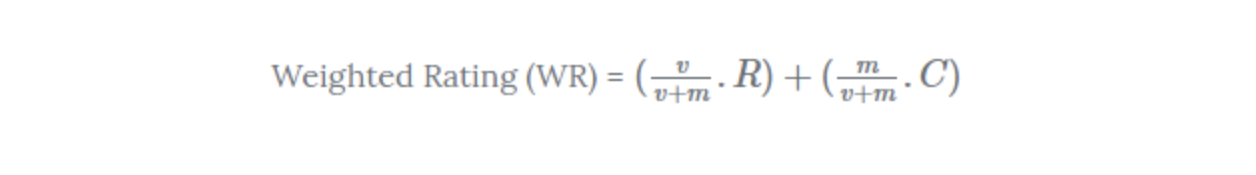

where,<br>

v is the number of votes for the movie;<br>
m is the minimum votes required to be listed in the chart;<br>
R is the average rating of the movie; And<br>
C is the mean vote across the whole report<br>
We already have v(vote_count) and R (vote_average) and C can be calculated as

In [76]:
C= ott_content['imdb_score'].mean()
C

6.343762952728709

In [77]:
m= ott_content['imdb_votes'].quantile(0.9)
m

46765.000000000015

In [78]:
q_movies = ott_content.copy().loc[ott_content['imdb_votes'] >= m]
q_movies.shape

(2022, 15)

In [79]:
def weighted_rating(x, m=m, C=C):
    v = x['imdb_votes']
    R = x['imdb_score']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [80]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [81]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'imdb_votes', 'imdb_score', 'score']].head(10)

title  imdb_votes  imdb_score  \
15271                                   Breaking Bad   1936461.0         9.5   
12848                       The Shawshank Redemption   2548100.0         9.3   
14357                                      Chernobyl    779097.0         9.4   
13661                                Game of Thrones   2134702.0         9.2   
13146                               Band of Brothers    477321.0         9.4   
13158                                The Dark Knight   2684317.0         9.0   
13143                                       The Wire    346806.0         9.3   
13178  The Lord of the Rings: The Return of the King   1865989.0         9.0   
15277                     Avatar: The Last Airbender    324247.0         9.3   
12846                                   The Sopranos    412547.0         9.2   

          score  
15271  9.425575  
12848  9.246722  
14357  9.226938  
13661  9.138770  
13146  9.127287  
13158  8.954517  
13143  8.948733  
13178  8.935058  
15277  8.927375  
12846  8.909191

The demographic recommender provides a general chart of recommended movies to all the users. They are not sensitive to the interests and tastes of a particular user. This is when we move on to a more refined system- Content Basesd Filtering.

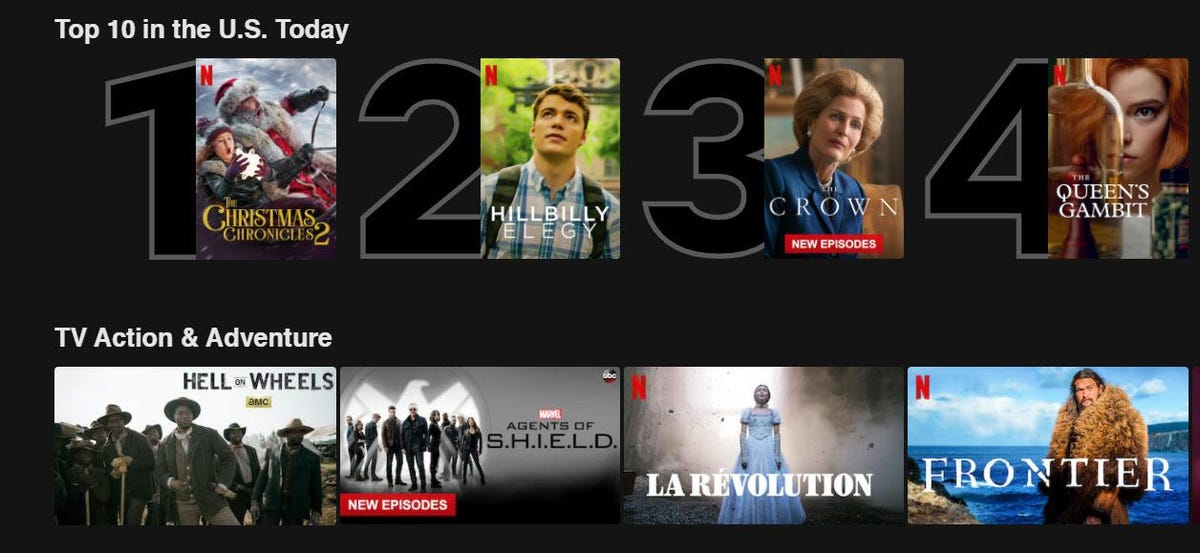

On the <b>Trending Now</b> section of these systems, we can find movies that are currently popular. The movies in this section can be obtained by sorting the dataset based on the popularity column.

## Content Based Filtering

In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

In [82]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

In [84]:
#Replace NaN with an empty string
ott_content['description'] = ott_content['description'].fillna('')

In [85]:
#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(ott_content['description'])

In [86]:
#Output the shape of tfidf_matrix
tfidf_matrix.shape

(22313, 45023)

We see that over 45,000 different words were used to describe the 22000 movies and shows in our dataset.<br>

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the cosine similarity scores. There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:

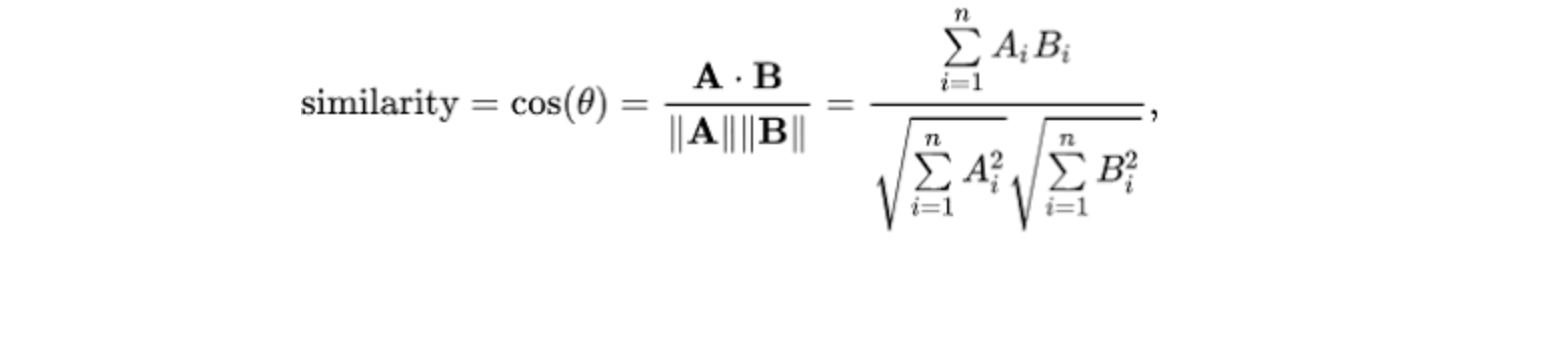

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

In [87]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

In [88]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [89]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(ott_content.index, index=ott_content['title']).drop_duplicates()

We are now in a good position to define our recommendation function. These are the following steps we'll follow :-

Get the index of the movie given its title.
Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
Return the titles corresponding to the indices of the top elements.

In [90]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return ott_content['title'].iloc[movie_indices]

In [91]:
get_recommendations('The Dark Knight Rises')

14875    Batman: The Long Halloween, Part One
14869    Batman: The Long Halloween, Part Two
14237                     Batman vs. Two-Face
13158                         The Dark Knight
12934                           Batman Beyond
14616          Lego DC Batman: Family Matters
15040            Batman: The Audio Adventures
12857             Batman: The Animated Series
14193              Batman: Gotham by Gaslight
14227                     Justice League Dark
Name: title, dtype: object

While our system has done a decent job of finding movies with similar plot descriptions, the quality of recommendations is not that great. "The Dark Knight Rises" returns all Batman movies while it is more likely that the people who liked that movie are more inclined to enjoy other Christopher Nolan movies. This is something that cannot be captured by the present system.

#### Credits, Genres and Keywords Based Recommender
It goes without saying that the quality of our recommender would be increased with the usage of better metadata. That is exactly what we are going to do in this section. We are going to build a recommender based on the following metadata: the 3 top actors, the director, related genres and the movie plot keywords.

From the cast, crew and keywords features, we need to extract the three most important actors, the director and the keywords associated with that movie. Right now, our data is present in the form of "stringified" lists , we need to convert it into a safe and usable structure

In [92]:
ott_credits.head()

id              name      character   role
0  tm87233     James Stewart  George Bailey  ACTOR
1  tm87233        Donna Reed     Mary Hatch  ACTOR
2  tm87233  Lionel Barrymore     Mr. Potter  ACTOR
3  tm87233   Thomas Mitchell    Uncle Billy  ACTOR
4  tm87233     Henry Travers       Clarence  ACTOR

For every type of content, there are multiple rows. That is, for one movie/show id the names of actors is not a list of strings. Hence we have to convert the given dataframe such that there are 3 columms - movie/show id, actors and directors. 

In [93]:
ott_credits.role.value_counts()

ACTOR       349432
DIRECTOR     21114
Name: role, dtype: int64

In [94]:
ott_credits.columns

Index(['id', 'name', 'character', 'role'], dtype='object')

In [95]:
ott_credits.drop(columns = ['character'], inplace = True, axis = 1)

In [96]:
ott_credits.sample()

id          name   role
108746  tm974552  Katina Nikou  ACTOR

In [97]:
ott_credits.groupby(['id','role'])

In [98]:
ott_credits_actors = ott_credits[ott_credits['role']=='ACTOR']

In [99]:
ott_credits_actors = ott_credits_actors.groupby('id')['name'].apply(list)

In [100]:
ott_credits.columns

Index(['id', 'name', 'role'], dtype='object')

In [101]:
# Get a list of unique movie ids
movie_ids = ott_credits['id'].unique()

# Create an empty dictionary to store the results
result = {}

# Loop through each movie id and create a dictionary with actors and directors
for movie_id in movie_ids:
    
    # Get the rows corresponding to this movie id
    movie_df = ott_credits[ott_credits['id'] == movie_id]
    
    # Create empty lists for actors and directors
    actors = []
    directors = []
    
    # Loop through each row and add names to the appropriate list
    for index, row in movie_df.iterrows():
        if row['role'] == 'ACTOR':
            actors.append(row['name'])
        elif row['role'] == 'DIRECTOR':
            directors.append(row['name'])
    
    # Add the actors and directors to the result dictionary
    result[movie_id] = {'actors': actors, 'directors': directors}

In [102]:
result = pd.DataFrame(result)

In [103]:
result = result.T

In [104]:
type(result['actors'])

pandas.core.series.Series

In [105]:
result

actors  \
tm87233    [James Stewart, Donna Reed, Lionel Barrymore, ...   
tm143047   [Groucho Marx, Harpo Marx, Chico Marx, Zeppo M...   
tm83884    [Cary Grant, Rosalind Russell, Ralph Bellamy, ...   
ts20945                 [Joe Besser, Moe Howard, Larry Fine]   
tm5012     [John Wayne, Montgomery Clift, Joanne Dru, Wal...   
...                                                      ...   
ts378183   [Peyton List, Kristian Flores, Spencer MacPher...   
tm1238886  [Tyler Posey, Crystal Reed, Holland Roden, Tyl...   
tm1285862  [Diego Boneta, Monica Barbaro, Casey Thomas Br...   
ts378319                                            [RuPaul]   
tm1312309                                                 []   

                              directors  
tm87233                   [Frank Capra]  
tm143047                  [Leo McCarey]  
tm83884    [Howard Hawks, Howard Hawks]  
ts20945                              []  
tm5012     [Howard Hawks, Howard Hawks]  
...                                 ...  
ts378183                             []  
tm1238886             [Russell Mulcahy]  
tm1285862              [Jonah Feingold]  
ts378319                             []  
tm1312309             [Nathaniel Lezra]  

[21481 rows x 2 columns]

In [106]:
result = result.rename_axis('id').reset_index()

In [107]:
result.columns

Index(['id', 'actors', 'directors'], dtype='object')

In [108]:
ott_df = ott_content.copy()

In [109]:
ott_df = ott_df.merge(result, on = 'id')

In [110]:
ott_df.head(2)

id                  title   type  \
0   tm87233  It's a Wonderful Life  MOVIE   
1  tm143047              Duck Soup  MOVIE   

                                         description  release_year  \
0  A holiday favourite for generations...  George...          1946   
1  Rufus T. Firefly is named president/dictator o...          1933   

  age_certification  runtime  seasons  imdb_score  imdb_votes  \
0                PG      130      0.0         8.6    467766.0   
1               NaN       69      0.0         7.8     60933.0   

   tmdb_popularity  tmdb_score   genre production_country  \
0           27.611       8.261   drama                 US   
1            9.013       7.357  comedy                 US   

       streaming_platform                                             actors  \
0  ['amazon_prime_video']  [James Stewart, Donna Reed, Lionel Barrymore, ...   
1  ['amazon_prime_video']  [Groucho Marx, Harpo Marx, Chico Marx, Zeppo M...   

       directors  
0  [Frank Capra]  
1  [Leo McCarey]

In [112]:
ott_df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'seasons', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'tmdb_score', 'genre', 'production_country',
       'streaming_platform', 'actors', 'directors'],
      dtype='object')

The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.

In [115]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [116]:
# Apply clean_data function to your features.
features = ['description','actors', 'directors', 'genre']

for feature in features:
    ott_df[feature] = ott_df[feature].apply(clean_data)

In [117]:
ott_df.head()

id                  title   type  \
0   tm87233  It's a Wonderful Life  MOVIE   
1  tm143047              Duck Soup  MOVIE   
2   tm83884        His Girl Friday  MOVIE   
3   ts20945      The Three Stooges   SHOW   
4    tm5012              Red River  MOVIE   

                                         description  release_year  \
0  aholidayfavouriteforgenerations...georgebailey...          1946   
1  rufust.fireflyisnamedpresident/dictatorofbankr...          1933   
2  hildy,thejournalistformerwifeofnewspapereditor...          1940   
3  thethreestoogeswereanamericanvaudevilleandcome...          1934   
4  headstrongthomasdunsonstartsathrivingtexascatt...          1948   

  age_certification  runtime  seasons  imdb_score  imdb_votes  \
0                PG      130      0.0         8.6    467766.0   
1               NaN       69      0.0         7.8     60933.0   
2               NaN       92      0.0         7.8     60244.0   
3             TV-PG       19     26.0         8.5      1149.0   
4               NaN      133      0.0         7.8     32210.0   

   tmdb_popularity  tmdb_score    genre production_country  \
0           27.611       8.261    drama                 US   
1            9.013       7.357   comedy                 US   
2           14.759       7.433    drama                 US   
3           15.424       7.600   comedy                 US   
4           12.400       7.400  western                 US   

                     streaming_platform  \
0                ['amazon_prime_video']   
1                ['amazon_prime_video']   
2  ['amazon_prime_video', 'paramount+']   
3                ['amazon_prime_video']   
4  ['amazon_prime_video', 'paramount+']   

                                              actors  \
0  [jamesstewart, donnareed, lionelbarrymore, tho...   
1  [grouchomarx, harpomarx, chicomarx, zeppomarx,...   
2  [carygrant, rosalindrussell, ralphbellamy, gen...   
3                  [joebesser, moehoward, larryfine]   
4  [johnwayne, montgomeryclift, joannedru, walter...   

                    directors  
0                [frankcapra]  
1                [leomccarey]  
2  [howardhawks, howardhawks]  
3                          []  
4  [howardhawks, howardhawks]

We are now in a position to create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).

In [148]:
def create_soup(x):
    return ' '.join(x['actors']) + ' ' + ' '.join(x['directors']) + ' ' + x['genre'] + ' ' + ' '.join(x['streaming_platform']) + ' ' + x['description'] 
ott_df['soup'] = ott_df.apply(create_soup, axis=1)

The next steps are the same as what we did with our plot description based recommender. One important difference is that we use the CountVectorizer() instead of TF-IDF. This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.

In [149]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(ott_df['soup'])

In [150]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [153]:
ott_df.drop(columns = ['level_0'], axis = 1, inplace = True)

In [155]:
ott_df.drop(columns = ['index'], axis = 1, inplace = True)

In [160]:
ott_df.head()

index        id                  title   type  \
0      0   tm87233  It's a Wonderful Life  MOVIE   
1      1  tm143047              Duck Soup  MOVIE   
2      2   tm83884        His Girl Friday  MOVIE   
3      3   ts20945      The Three Stooges   SHOW   
4      4    tm5012              Red River  MOVIE   

                                         description  release_year  \
0  aholidayfavouriteforgenerations...georgebailey...          1946   
1  rufust.fireflyisnamedpresident/dictatorofbankr...          1933   
2  hildy,thejournalistformerwifeofnewspapereditor...          1940   
3  thethreestoogeswereanamericanvaudevilleandcome...          1934   
4  headstrongthomasdunsonstartsathrivingtexascatt...          1948   

  age_certification  runtime  seasons  imdb_score  imdb_votes  \
0                PG      130      0.0         8.6    467766.0   
1               NaN       69      0.0         7.8     60933.0   
2               NaN       92      0.0         7.8     60244.0   
3             TV-PG       19     26.0         8.5      1149.0   
4               NaN      133      0.0         7.8     32210.0   

   tmdb_popularity  tmdb_score    genre production_country  \
0           27.611       8.261    drama                 US   
1            9.013       7.357   comedy                 US   
2           14.759       7.433    drama                 US   
3           15.424       7.600   comedy                 US   
4           12.400       7.400  western                 US   

                     streaming_platform  \
0                ['amazon_prime_video']   
1                ['amazon_prime_video']   
2  ['amazon_prime_video', 'paramount+']   
3                ['amazon_prime_video']   
4  ['amazon_prime_video', 'paramount+']   

                                              actors  \
0  [jamesstewart, donnareed, lionelbarrymore, tho...   
1  [grouchomarx, harpomarx, chicomarx, zeppomarx,...   
2  [carygrant, rosalindrussell, ralphbellamy, gen...   
3                  [joebesser, moehoward, larryfine]   
4  [johnwayne, montgomeryclift, joannedru, walter...   

                    directors  \
0                [frankcapra]   
1                [leomccarey]   
2  [howardhawks, howardhawks]   
3                          []   
4  [howardhawks, howardhawks]   

                                                soup  
0  jamesstewart donnareed lionelbarrymore thomasm...  
1  grouchomarx harpomarx chicomarx zeppomarx marg...  
2  carygrant rosalindrussell ralphbellamy geneloc...  
3  joebesser moehoward larryfine  comedy [ ' a m ...  
4  johnwayne montgomeryclift joannedru walterbren...

In [157]:
# Reset index of our main DataFrame and construct reverse mapping as before
ott_df = ott_df.reset_index()
indices = pd.Series(ott_df.index, index=ott_df['title'])

We can now reuse our get_recommendations() function by passing in the new cosine_sim2 matrix as your second argument.

In [158]:
get_recommendations('Duck Soup', cosine_sim2)

405            Broadway Limited
304       Reaching for the Moon
11388                  Soy Luna
884        Hillbilly Blitzkrieg
69        Swing High, Swing Low
5        The Jack Benny Program
154        Flirting with Danger
1653          Uyarntha Manithan
2618               Donkey Punch
5875          Ryan Bingham Live
Name: title, dtype: object

In [159]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

20359              Kedibone
20806               Bahasha
9628       The Oath of Love
12377         Super Friends
12355             Norma Rae
6011           The Gardener
13068        Only Yesterday
9586            The Subject
11081             You Wish!
9575     Satyameva Jayate 2
Name: title, dtype: object

We see that our recommender has been successful in capturing more information due to more metadata and has given us (arguably) better recommendations. Therefore, to our features above we can add production_company . We can also increase the weight of the director , by adding the feature multiple times in the soup.

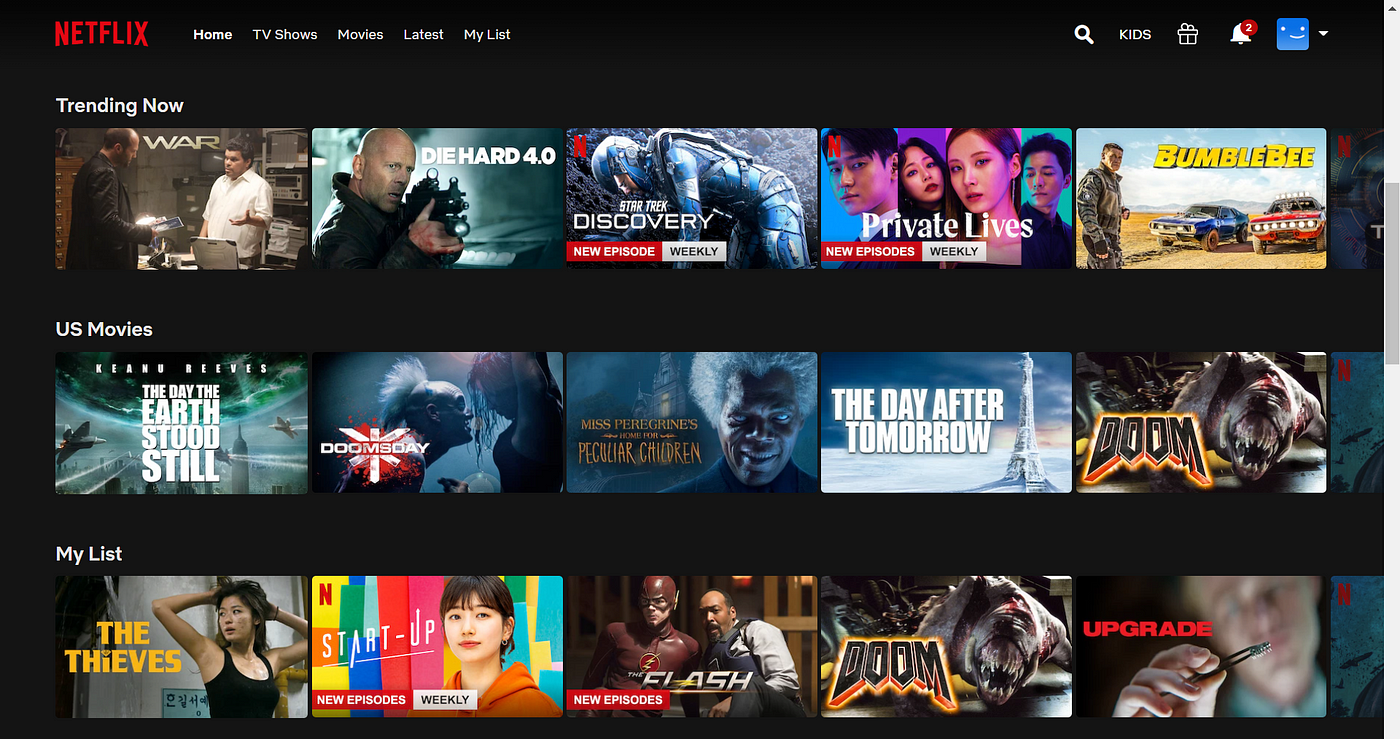

In [178]:
# !pip install surprise

## Project by Surbhi Wahie and Shrunali Salian